In [ ]:
import matplotlib.pyplot as plt
import torch

## Create model with named layers

In [ ]:
class MyModel(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.linear_1 = torch.nn.Linear(in_features=100, out_features=200)
        self.activation = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.linear_1(x)
        x = self.activation(x)
        x = self.linear_2(x)
        x = self.softmax(x)
        return x

m = MyModel()

In [ ]:
m

MyModel(
  (linear_1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear_2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [ ]:
for l in m.named_children():
    print(l)

('linear_1', Linear(in_features=100, out_features=200, bias=True))
('activation', ReLU())
('linear_2', Linear(in_features=200, out_features=10, bias=True))
('softmax', Softmax(dim=None))


In [ ]:
for l in m.children():
    print(l)

Linear(in_features=100, out_features=200, bias=True)
ReLU()
Linear(in_features=200, out_features=10, bias=True)
Softmax(dim=None)


In [ ]:
print(m.linear_1)
print(m.get_submodule('linear_1'))

Linear(in_features=100, out_features=200, bias=True)
Linear(in_features=100, out_features=200, bias=True)


In [ ]:
m.linear_1.in_features, m.linear_1.out_features, list(m.linear_1.named_modules())

(100, 200, [('', Linear(in_features=100, out_features=200, bias=True))])

In [ ]:
print('Model params:')
for param in m.parameters():
    print(param)

Model params:
Parameter containing:
tensor([[ 0.0992, -0.0085, -0.0423,  ...,  0.0534,  0.0739, -0.0606],
        [-0.0435, -0.0787, -0.0085,  ...,  0.0607,  0.0159,  0.0021],
        [-0.0813,  0.0046,  0.0432,  ..., -0.0574, -0.0340,  0.0947],
        ...,
        [-0.0057,  0.0755, -0.0454,  ...,  0.0340,  0.0850,  0.0471],
        [ 0.0794,  0.0841, -0.0531,  ...,  0.0933, -0.0531,  0.0922],
        [ 0.0648, -0.0208, -0.0251,  ..., -0.0537,  0.0776,  0.0120]],
       requires_grad=True)
Parameter containing:
tensor([-0.0532, -0.0107,  0.0859,  0.0288, -0.0155,  0.0267, -0.0251, -0.0459,
         0.0131, -0.0018,  0.0719, -0.0793, -0.0032, -0.0140,  0.0023,  0.0302,
        -0.0545,  0.0561, -0.0597, -0.0661,  0.0587,  0.0599, -0.0679,  0.0853,
         0.0637,  0.0080, -0.0356, -0.0050, -0.0012, -0.0005,  0.0817, -0.0057,
         0.0233,  0.0531, -0.0648, -0.0764,  0.0209, -0.0043,  0.0144, -0.0737,
         0.0751, -0.0852,  0.0530, -0.0418, -0.0419,  0.0480, -0.0207,  0.0310,
 

In [ ]:
print('Layer params:')
for param in m.get_submodule('linear_2').parameters():
    print(param)

Layer params:
Parameter containing:
tensor([[ 0.0613, -0.0123, -0.0162,  ..., -0.0064, -0.0253, -0.0391],
        [ 0.0620,  0.0562,  0.0555,  ..., -0.0031,  0.0603,  0.0464],
        [-0.0678,  0.0338,  0.0234,  ...,  0.0028, -0.0502,  0.0348],
        ...,
        [ 0.0018, -0.0046, -0.0492,  ..., -0.0221,  0.0603,  0.0377],
        [ 0.0460,  0.0230,  0.0396,  ...,  0.0208,  0.0684, -0.0253],
        [ 0.0685, -0.0433,  0.0125,  ..., -0.0089,  0.0692,  0.0337]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0570, -0.0169,  0.0448,  0.0683,  0.0174, -0.0411,  0.0676, -0.0325,
        -0.0085, -0.0409], requires_grad=True)


Experiment with grad saliency

In [ ]:
X = torch.rand(size=(2, 100), dtype=torch.float, requires_grad=True)
X.shape

torch.Size([2, 100])

In [ ]:
preds = m(X)

Now, back propagation from the expected category (argmax) for first data sample to X

In [ ]:
preds[0:]

tensor([[0.1090, 0.0843, 0.0785, 0.0846, 0.0965, 0.1133, 0.0827, 0.1031, 0.1500,
         0.0980],
        [0.1174, 0.0814, 0.0796, 0.0867, 0.0953, 0.1201, 0.0860, 0.1069, 0.1335,
         0.0932]], grad_fn=<SliceBackward0>)

In [ ]:
preds[0,5].backward()

In [ ]:
X.grad

tensor([[-5.5405e-04,  5.3253e-04, -5.3873e-04,  1.2949e-03, -8.8135e-04,
          2.2567e-03, -2.7004e-03,  3.7113e-03,  3.1533e-04, -2.7067e-03,
         -1.8053e-03,  4.7756e-04,  7.2335e-04, -7.2701e-04, -4.2274e-03,
          8.6505e-04,  2.0689e-03, -4.3169e-03, -2.9006e-03, -2.7051e-04,
         -3.4871e-03, -1.3673e-03, -1.3148e-03, -3.6552e-03,  7.4033e-04,
          3.2386e-03,  1.6786e-03,  2.2273e-03,  2.1829e-03,  6.3781e-03,
          1.9855e-03, -3.1766e-03, -2.2845e-05, -9.1974e-04, -1.4612e-03,
         -1.4774e-03, -3.7138e-03,  1.9906e-03,  3.0753e-03,  1.5315e-03,
          2.1411e-03,  4.9817e-04,  9.4574e-04,  7.0303e-04, -1.8925e-03,
          1.6131e-03,  6.4761e-04, -2.8179e-03, -2.1279e-03,  2.3424e-03,
          7.9305e-04,  3.4328e-03,  2.2745e-03,  3.4448e-03,  9.1369e-04,
         -2.1575e-03,  2.6332e-03,  1.8131e-03, -1.0873e-03,  1.1602e-03,
         -1.3469e-03, -3.6017e-03,  4.1142e-03, -1.0976e-03, -1.1937e-03,
         -1.8686e-04, -9.5922e-04,  2.

Makes sense as we only looked at the backprop from the value of `preds[0, 5]`

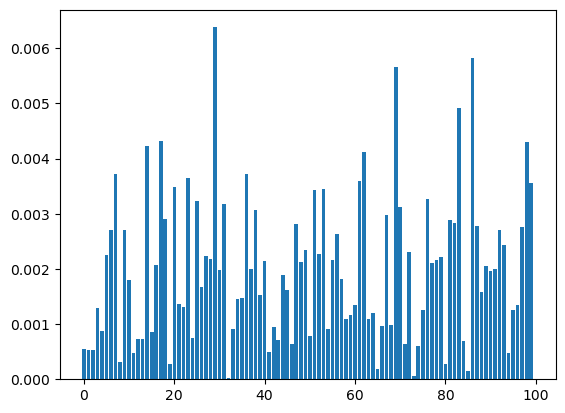

In [ ]:
plt.bar(x=range(X.shape[1]), height=X.grad[0].abs());

In [ ]:
modules = list(m.children())
for i, p in enumerate(m.parameters()):
    display(i, modules[i], p.shape, type(p))

0

Linear(in_features=100, out_features=200, bias=True)

torch.Size([200, 100])

torch.nn.parameter.Parameter

1

ReLU()

torch.Size([200])

torch.nn.parameter.Parameter

2

Linear(in_features=200, out_features=10, bias=True)

torch.Size([10, 200])

torch.nn.parameter.Parameter

3

Softmax(dim=None)

torch.Size([10])

torch.nn.parameter.Parameter

In [ ]:
tinymodel()

In [ ]:
for i, p in enumerate(tinymodel.parameters()):
    display(i, modules[i], p.shape)